## Observations and Insights 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Combined = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
Combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Checking the number of mice.
NumberofMice = mouse_metadata['Mouse ID'].count()
NumberofMice

249

In [108]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Mouse_list_Dups = Combined[Combined.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


In [109]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_list_Dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Mouse_DeDup = Combined.sort_values(by='Mouse ID').drop_duplicates(subset=['Mouse ID','Timepoint'])
Mouse_DeDup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [111]:
# Checking the number of mice in the clean DataFrame.
NumberofMice = len(Mouse_DeDup['Mouse ID'].unique())
NumberofMice

249

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_Tumor = Mouse_DeDup.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]
Regimen_Tumor_group = Regimen_Tumor.groupby("Drug Regimen")
Tumor_Summary = Regimen_Tumor_group.mean()
Tumor_Summary['Tumor Median'] = Regimen_Tumor_group['Tumor Volume (mm3)'].median()
Tumor_Summary['Tumor Stardard Deviation'] = Regimen_Tumor_group['Tumor Volume (mm3)'].std()
Tumor_Summary['Tumor Varience'] = Regimen_Tumor_group['Tumor Volume (mm3)'].var()
Tumor_Summary['Tumor SEM']= Regimen_Tumor_group['Tumor Volume (mm3)'].sem()
Tumor_Summary = Tumor_Summary.rename(columns={"Tumor Volume (mm3)":'Tumor Mean'})
Tumor_Summary
# This method produces everything in a single groupby function


,Tumor Mean,Tumor Median,Tumor Stardard Deviation,Tumor Varience,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.389178,50.909965,6.566306,43.116372,0.525725
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

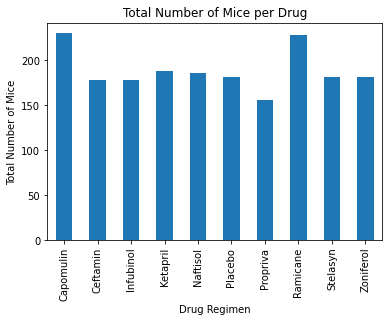

In [114]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Mouse_Regimen = Mouse_DeDup.loc[:,["Drug Regimen","Mouse ID"]]
Mouse_Data = Mouse_Regimen.groupby("Drug Regimen")
Mouse_Count = Mouse_Data['Mouse ID'].count()
Mouse_Chart = Mouse_Count.plot(kind='bar')

# Set the ylabel using class methods
Mouse_Chart.set_ylabel("Total Number of Mice")
Mouse_Chart.set_title("Total Number of Mice per Drug")

plt.show()

<BarContainer object of 10 artists>

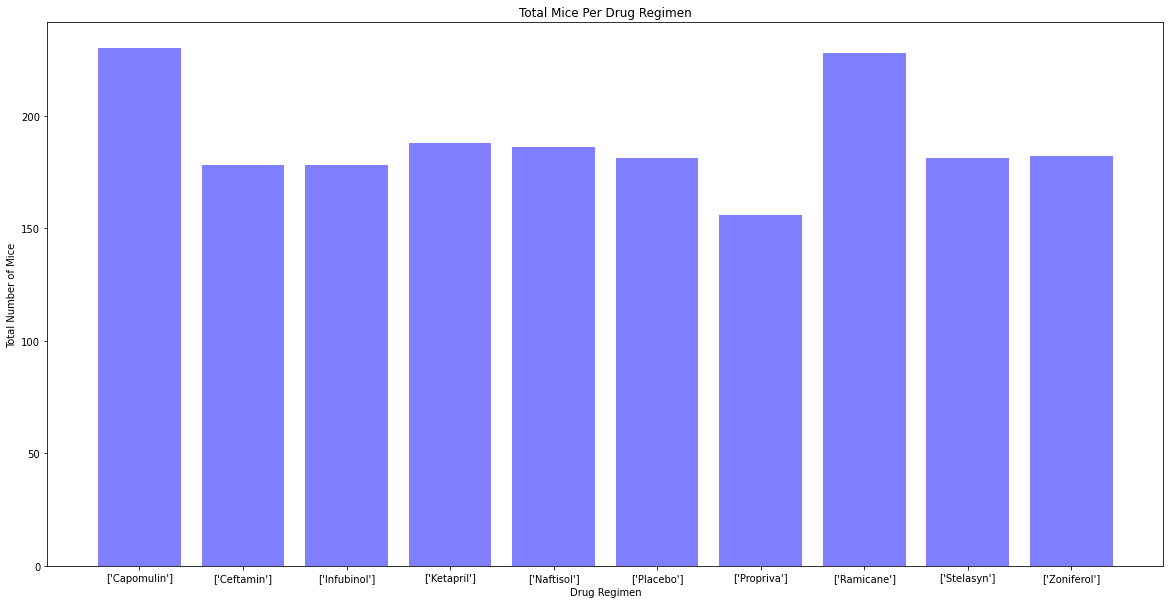

In [115]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import numpy as np
Mouse_Count.reset_index()

Mouse_Cnt_list = Mouse_Data['Mouse ID'].count()
Drugs = Mouse_Data['Drug Regimen'].unique()
y_Axis = np.arange(len(Drugs))

#change sizing and show plot
plt.figure(figsize=(20,10))

# Give the chart a title, x label, and y label
plt.title("Total Mice Per Drug Regimen")
plt.xticks(y_Axis, Drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.bar(y_Axis, Mouse_Cnt_list, color="b", align="center" , alpha=0.5)

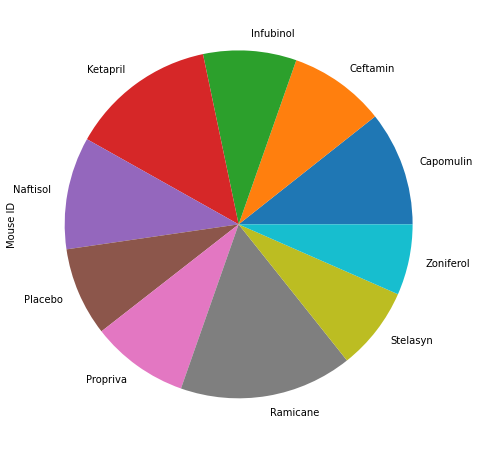

In [116]:
# Generate a pie plot showing the distribution of male mice using pandas

Gender_Base = Mouse_DeDup.loc[:,["Sex","Mouse ID","Drug Regimen"]]
Male = Gender_Base['Sex'] == 'Male'
Gender_Filter = Gender_Base[Male]
Gender_Group = Gender_Filter.groupby("Drug Regimen")
Gender_List = Gender_Filter['Drug Regimen'].unique()
Gender_Count = Gender_Group['Mouse ID'].count()
plot = Gender_Count.plot.pie(subplots=True, figsize=(10,8))

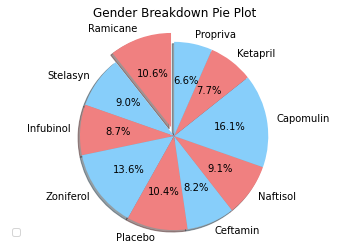

In [117]:
# Generate a pie plot showing the distribution of male mice using pyplot

colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0, 0,0 ,0 , 0, 0, 0, 0,0)

plt.title("Gender Breakdown Pie Plot")
plt.legend(Gender_List, loc=3)
plt.pie(Gender_Count, explode=explode, labels=Gender_List, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

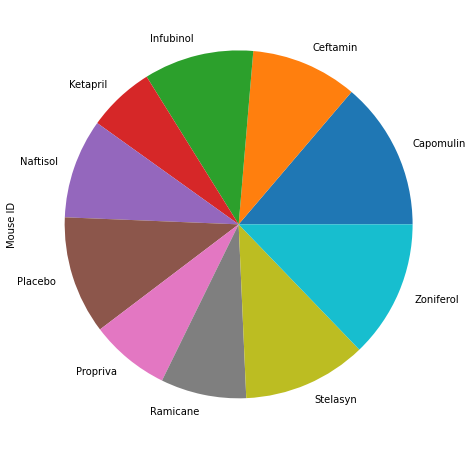

In [118]:
# Generate a pie plot showing the distribution of female mice using pandas

Gender_Base = Mouse_DeDup.loc[:,["Sex","Mouse ID","Drug Regimen"]]
female = Gender_Base['Sex'] == 'Female'
Gender_Filter = Gender_Base[female]
Gender_Group = Gender_Filter.groupby("Drug Regimen")
Gender_List = Gender_Filter['Drug Regimen'].unique()
Gender_Count = Gender_Group['Mouse ID'].count()
plot = Gender_Count.plot.pie(subplots=True, figsize=(10,8))

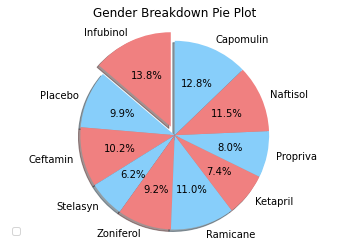

In [119]:
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0, 0,0 ,0 , 0, 0, 0, 0,0)

plt.title("Gender Breakdown Pie Plot")
plt.legend(Gender_List, loc=3)
plt.pie(Gender_Count, explode=explode, labels=Gender_List, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Time_Base = Mouse_DeDup.loc[:,["Timepoint","Mouse ID","Tumor Volume (mm3)"]]
Time_Group = Time_Base.groupby("Mouse ID")
Time_Max = Time_Group.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MouseCombined = mouse_metadata.merge(Time_Max, how='inner', on='Mouse ID')
MouseCombined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,45.000000
1,s185,Capomulin,Female,3,17,45,45.000000
2,x401,Capomulin,Female,16,15,45,45.473753
3,m601,Capomulin,Male,22,17,45,45.000000
4,g791,Ramicane,Male,11,16,45,45.851531
...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712
245,z435,Propriva,Female,12,26,10,48.710661
246,z581,Infubinol,Female,24,25,45,62.754451
247,z795,Naftisol,Female,13,29,45,65.741070


In [121]:
import numpy as np

# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Val = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for i in Treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Testing = MouseCombined.loc[MouseCombined['Drug Regimen'] == i]
    # add subset
    Tumor_Val = Testing['Tumor Volume (mm3)'].unique()
    Tumor_Val
    # Determine outliers using upper and lower bounds
    lowerq = np.quantile(Tumor_Val, 0.25)
    upperq = np.quantile(Tumor_Val, 0.75)
    middle = np.quantile(Tumor_Val, 0.5)
    iqr = upperq-lowerq
    print(f"Summary for Drug: {i}")
    print(f"")
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {middle} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"")
    
    
    


Summary for Drug: Capomulin

The lower quartile of Tumor Volume (mm3) is: 45.743090050000006
The upper quartile of Tumor Volume (mm3) is: 47.010712305
The interquartile range of Tumor Volume (mm3) is: 1.267622254999992
The the median of Tumor Volume (mm3) is: 46.408361299999996 
Values below 43.84165666750002 could be outliers.
Values above 48.91214568749999 could be outliers.

Summary for Drug: Ramicane

The lower quartile of Tumor Volume (mm3) is: 45.5566268
The upper quartile of Tumor Volume (mm3) is: 46.453171255
The interquartile range of Tumor Volume (mm3) is: 0.8965444550000043
The the median of Tumor Volume (mm3) is: 45.80882083 
Values below 44.211810117499994 could be outliers.
Values above 47.79798793750001 could be outliers.

Summary for Drug: Infubinol

The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is:

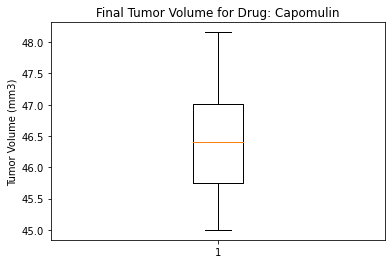

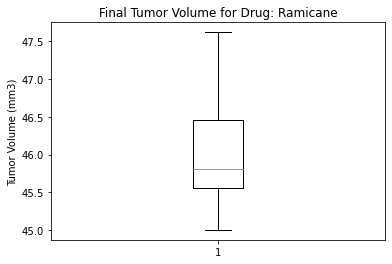

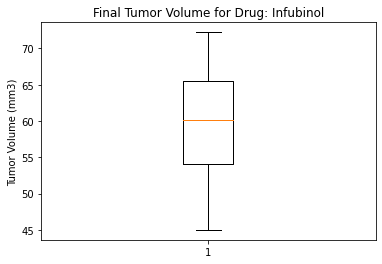

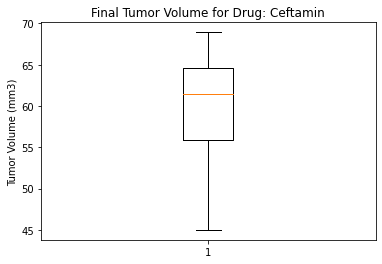

In [122]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for i in Treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Testing = MouseCombined.loc[MouseCombined['Drug Regimen'] == i]
    # add subset
    Tumor_Val = Testing['Tumor Volume (mm3)'].unique()
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume for Drug: {i}')
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(Tumor_Val)
    plt.show()

## Line and Scatter Plots

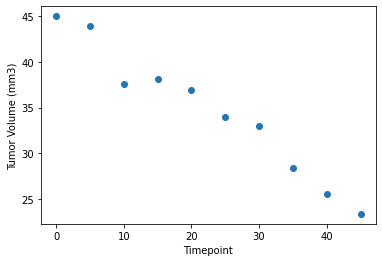

In [123]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_set = Combined.loc[Combined['Drug Regimen'] == 'Capomulin']
First_Mouse = Capomulin_set.loc[Capomulin_set['Mouse ID'] == 's185']
plt.scatter(First_Mouse.iloc[:,5],First_Mouse.iloc[:,6])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

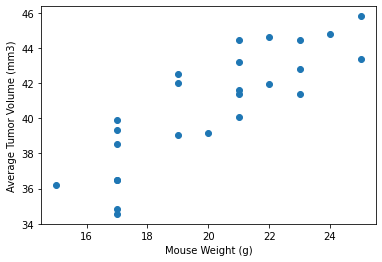

In [124]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Base = Combined.loc[:,["Mouse ID","Weight (g)","Tumor Volume (mm3)",'Drug Regimen']]
Capomulin_Base = Capomulin_Base.loc[Capomulin_Base['Drug Regimen'] == 'Capomulin']
Capomulin_grp = Capomulin_Base.groupby('Mouse ID')
Capomulin_avg = Capomulin_grp.mean()
plt.scatter(Capomulin_avg.iloc[:,0],Capomulin_avg.iloc[:,1])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

Weight = Capomulin_avg.iloc[:,0]
Avg_Vol  = Capomulin_avg.iloc[:,1]

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(stats.pearsonr(Weight,Avg_Vol)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


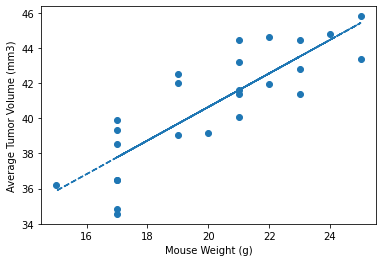

In [126]:
# Linear Regression model


c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(Weight,Avg_Vol)
c_fit = c_slope * Weight + c_int
plt.scatter(Weight,Avg_Vol)
plt.plot(Weight,c_fit,"--")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()